### "Quick 'n' Dirty" NilsPod Analysis

In [13]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import signal
import os
import warnings
warnings.filterwarnings("ignore")

from NilsPodLib import Dataset, Session, SyncedSession, calibration_utils

%load_ext autoreload
%autoreload 2
%matplotlib notebook
is_calibrated = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Get path and list files

In [122]:
p = Path(r".")
files = [x for x in sorted(p.iterdir()) if x.is_file() and x.suffix == '.bin']

display([x.name for x in files])
file = files[3]

['Isabelle.bin', 'Lea.bin', 'Linda.bin', 'Sebastian.bin']

### Load Dataset and display some information

In [123]:
ds = Dataset.from_bin_file(file)
is_calibrated = False

display(ds.info.utc_datetime_start.strftime("%H:%M:%S"))
display(ds.info.utc_datetime_stop.strftime("%H:%M:%S"))
display(ds.info.sampling_rate_hz)
display(ds.info.n_samples)
display(ds.info.duration_s)
display(ds.info.enabled_sensors)
# convert duration from number of samples (as check)
#display("{:.2f} h".format((ds.info.n_samples / 51.2) / 3600))

'06:22:31'

'14:07:26'

102.4

2856450

27895

('gyro', 'acc', 'baro')

### Apply Factory Calibration to IMU and Barometer

In [124]:
if not is_calibrated:
    ds.factory_calibrate_imu(inplace=True)
    ds.factory_calibrate_baro(inplace=True)
    ds.factory_calibrate_temperature(inplace=True)
    is_calibrated = True

### Localize and Convert Timestamp

In [125]:
df = ds.data_as_df(index='utc_datetime')
df = df.tz_localize("UTC").tz_convert("Europe/Berlin")

In [126]:
#df.to_csv(r'C:\Users\Linda\Documents\UNI\Semester 6\Ferienakademie\sebi.csv')

### Compute Acc and Gyro Norm

In [127]:
acc_norm = pd.DataFrame(index=df.index, data=np.linalg.norm(df.filter(like="acc"), axis=1), columns=['acc_norm'])
gyro_norm = pd.DataFrame(index=df.index, data=np.linalg.norm(df.filter(like="gyr"), axis=1), columns=['gyro_norm'])

In [128]:
data = pd.read_csv(r'C:\Users\Linda\Documents\UNI\Semester 6\Ferienakademie\app\nilspod\CompleteDataSet_training_competition.csv')

In [129]:
data

,date,AnkleAccelerometer x-axis,AnkleAccelerometer y-axis,AnkleAccelerometer z-axis,acc_x,acc_y,acc_z,RightPocketAngularVelocity x-axis,RightPocketAngularVelocity y-axis,RightPocketAngularVelocity z-axis,...,Infrared1,Infrared2,Infrared3,Infrared4,Infrared5,Infrared6,Subject,Trial,Activity,Tag
0,2018-07-04T12:04:17.738369,-1.005,0.229,-0.083,-0.981,0.260,0.098,1.768,-1.890,0.732,...,1,1,1,1,1,1,1,1,1,7
1,2018-07-04T12:04:17.790509,-1.005,0.228,-0.082,-0.981,0.260,0.098,3.354,-2.500,-0.061,...,1,1,1,1,1,1,1,1,1,7
2,2018-07-04T12:04:17.836632,-1.005,0.231,-0.079,-0.975,0.282,0.091,3.720,-2.500,-0.793,...,1,1,1,1,1,1,1,1,1,7
3,2018-07-04T12:04:17.885262,-1.005,0.231,-0.079,-0.973,0.301,0.103,-1.951,-1.159,-1.280,...,1,1,1,1,1,1,1,1,1,7
4,2018-07-04T12:04:17.945423,-1.008,0.229,-0.072,-0.973,0.301,0.103,-5.366,-1.280,-0.732,...,1,1,1,1,1,1,1,1,1,7
5,2018-07-04T12:04:18.007088,-1.005,0.223,-0.066,-0.983,0.266,0.117,-5.000,0.183,-1.890,...,1,1,1,1,1,1,1,1,1,7
6,2018-07-04T12:04:18.060229,-1.005,0.223,-0.066,-0.999,0.200,0.119,-2.683,2.500,-2.927,...,1,1,1,1,1,1,1,1,1,7
7,2018-07-04T12:04:18.104347,-1.008,0.220,-0.062,-0.999,0.200,0.119,2.866,2.134,-3.171,...,1,1,1,1,1,1,1,1,1,7
8,2018-07-04T12:04:18.148967,-1.000,0.259,-0.063,-0.993,0.227,0.096,7.866,-0.122,-3.598,...,1,1,1,1,1,1,1,1,1,7
9,2018-07-04T12:04:18.198098,-1.000,0.259,-0.063,-0.988,0.282,0.098,13.110,-1.646,-6.037,...,1,1,1,1,1,1,1,1,1,7


### Filter accelerometer

In [107]:
mean=acc_norm.rolling(256, min_periods=1).mean()

In [53]:
std= acc_norm.rolling(256, min_periods=1).std()

In [139]:
peak_thr = 7.0
time_diff = int(np.ceil(2*(ds.info.sampling_rate_hz)))
pause = int(np.ceil(0.5*(ds.info.sampling_rate_hz)))
sec_impact = 1.9
time_b = int(np.ceil(1.5*(ds.info.sampling_rate_hz)))
#orient = int(np.ceil(1*(ds.info.sampling_rate_hz)))

In [140]:
acc_ind=acc_norm.reset_index()

In [154]:
impact = acc_ind.loc[(acc_ind['acc_norm']>=peak_thr)]
impact

,date,acc_norm
247131,2019-09-29 05:31:22.832031+02:00,8.403758
247132,2019-09-29 05:31:22.841797+02:00,12.968268
247133,2019-09-29 05:31:22.851562+02:00,7.113581
247135,2019-09-29 05:31:22.871093+02:00,8.122481
247136,2019-09-29 05:31:22.880859+02:00,8.751272
247137,2019-09-29 05:31:22.890625+02:00,7.592404
590957,2019-09-29 05:59:28.496093+02:00,7.955728
924871,2019-09-29 06:26:32.617187+02:00,7.259319
944344,2019-09-29 06:28:06.757812+02:00,10.644367
944346,2019-09-29 06:28:06.777343+02:00,15.030319


In [155]:
for i in impact.iterrows():
    cancel = False
    for j in range (0,time_diff):
        index= i[0]+ pause+j
        if acc_ind['acc_norm'].loc[index]>= sec_impact:
            impact=impact.drop(i[0])
            cancel = True
            break
    if cancel:
        continue
    ind_m= i[0]- time_b 
    
    ##before fall
    mean = np.mean(df.iloc[ind_m:i[0]-pause+1,3:6])
    mean = pd.DataFrame(mean, columns=['mean'])
    
    ## search for maximum
    res = mean[(abs(mean['mean'])==max(abs(mean['mean'])))]
    
    angle= np.arccos(res['mean']/1)
    ##after fall
    ind_new= i[0] + pause
    mean_new = np.mean(df.iloc[ind_new:ind_new + time_diff +1,3:6])
    mean_new = pd.DataFrame(mean_new, columns=['mean'])
    ## search for maximum
    res_new = mean_new.loc[res.index]
    angle_new= np.arccos(res_new['mean']/1)
    print(impact)
    ##drop rows with change of angle below 30 degrees
    if ((abs(angle[0]-angle_new[0])<= np.deg2rad(60)) or (abs(angle[0]-angle_new[0])>= np.deg2rad(120))):
        print(angle[0]-angle_new[0])
        impact=impact.drop(i[0])
impact

                                    date   acc_norm
1232371 2019-09-29 06:51:34.765625+02:00   7.149544
1244450 2019-09-29 06:53:32.724609+02:00   7.481166
1244626 2019-09-29 06:53:34.443359+02:00   8.724203
1244627 2019-09-29 06:53:34.453125+02:00  10.490687
1275585 2019-09-29 06:58:36.777343+02:00   7.115657
1275773 2019-09-29 06:58:38.613281+02:00   7.056181
1275972 2019-09-29 06:58:40.556640+02:00  10.053077
1276189 2019-09-29 06:58:42.675781+02:00   7.587026
1276190 2019-09-29 06:58:42.685547+02:00   8.261828
1276700 2019-09-29 06:58:47.666015+02:00   7.012906
1276877 2019-09-29 06:58:49.394531+02:00  10.572790
1277000 2019-09-29 06:58:50.595703+02:00   8.642874
1279262 2019-09-29 06:59:12.685547+02:00   7.933137
1290132 2019-09-29 06:56:24.404297+02:00   7.377444
1294035 2019-09-29 06:56:36.416015+02:00   7.980184
1297278 2019-09-29 06:56:58.183593+02:00   7.456426
1310053 2019-09-29 06:58:04.423828+02:00   8.394832
1320892 2019-09-29 06:58:45.156250+02:00   7.114552
1761291 2019

,date,acc_norm
1232371,2019-09-29 06:51:34.765625+02:00,7.149544
1871770,2019-09-29 07:43:36.972656+02:00,7.694081
2747476,2019-09-29 08:54:50.800781+02:00,9.662813
2747477,2019-09-29 08:54:50.810547+02:00,11.022989
2747478,2019-09-29 08:54:50.820312+02:00,8.865354
2747479,2019-09-29 08:54:50.830078+02:00,8.212398


In [143]:
df.iloc[ind_m:i[0]-pause+1,3:6]

,acc_x,acc_y,acc_z
date,,,
2019-09-29 08:55:14.384765+02:00,0.788574,-0.122070,0.258789
2019-09-29 08:55:14.394531+02:00,0.725098,-0.227539,0.333496
2019-09-29 08:55:14.404297+02:00,0.763184,-0.192871,0.452637
2019-09-29 08:55:14.414062+02:00,0.754395,-0.045410,0.310547
2019-09-29 08:55:14.423828+02:00,0.836914,-0.075684,0.030762
2019-09-29 08:55:14.433593+02:00,0.776855,0.125000,-0.001465
2019-09-29 08:55:14.443359+02:00,0.504395,0.207031,0.061523
2019-09-29 08:55:14.453125+02:00,0.551270,0.057617,0.166992
2019-09-29 08:55:14.462890+02:00,0.816406,-0.162598,0.191895


### Ausrichtungsänderung

In [135]:
theta=np.arctan((np.sqrt((df['acc_x'])**2+ (df['acc_y'])**2))/df['acc_z'])
theta=pd.DataFrame(theta)
phi= np.arctan2(df['acc_y'],df['acc_x'])
phi = pd.DataFrame(phi)

In [14]:
def rolling_mean(df: pd.DataFrame, window_size: int) -> pd.DataFrame:
    return df.rolling(window_size, min_periods=1).mean()

### Convert Atmospheric Pressure to Altitude (rough estimate)

<IPython.core.display.Javascript object>


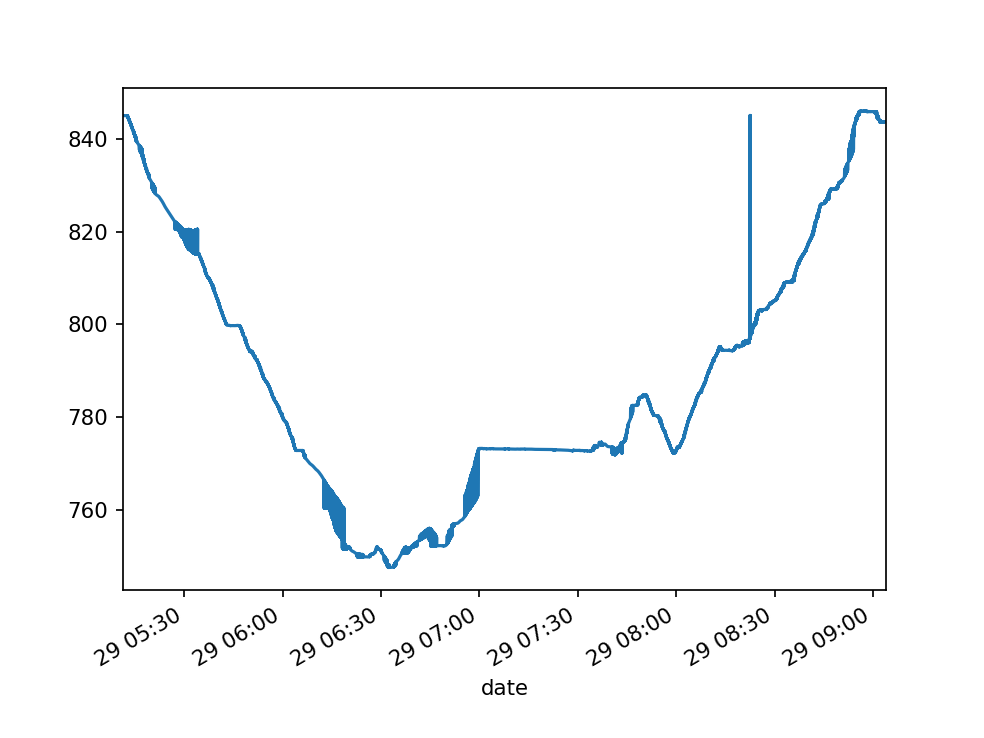

In [21]:
fig= plt.figure()
y = rolling_mean(df['baro'], 5000)[::100]
y.plot()

In [12]:
def baro_to_altitude(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'altitude'] = 44330 * (1.0 - (df.loc[:, 'baro'] / 1013.0) ** 0.1903)
    return df

In [13]:
df = baro_to_altitude(df)
baro = df.filter(like="baro")
alt = df.filter(like="alt")

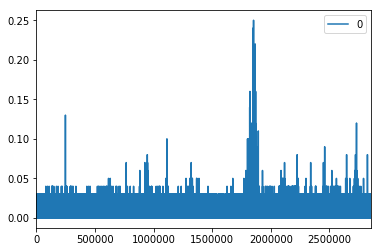

In [44]:
x = abs(np.diff(baro['baro']))
x
res = pd.DataFrame(x)
res.plot()

<IPython.core.display.Javascript object>


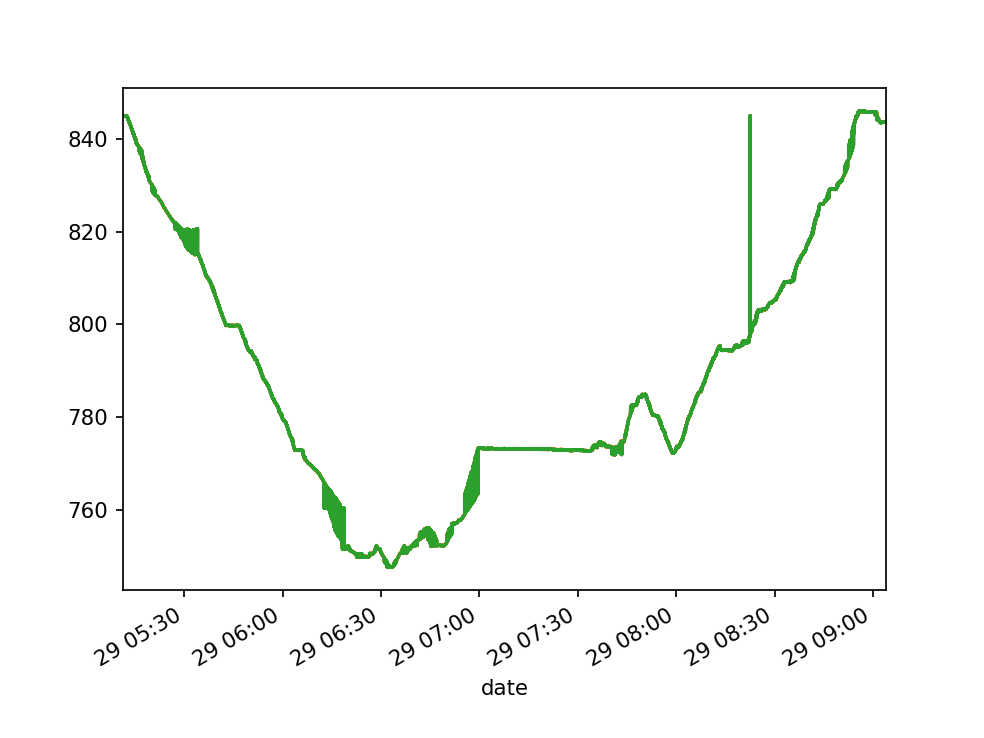

In [11]:
df['baro'][::100].plot()

### Plot Raw Data

<IPython.core.display.Javascript object>


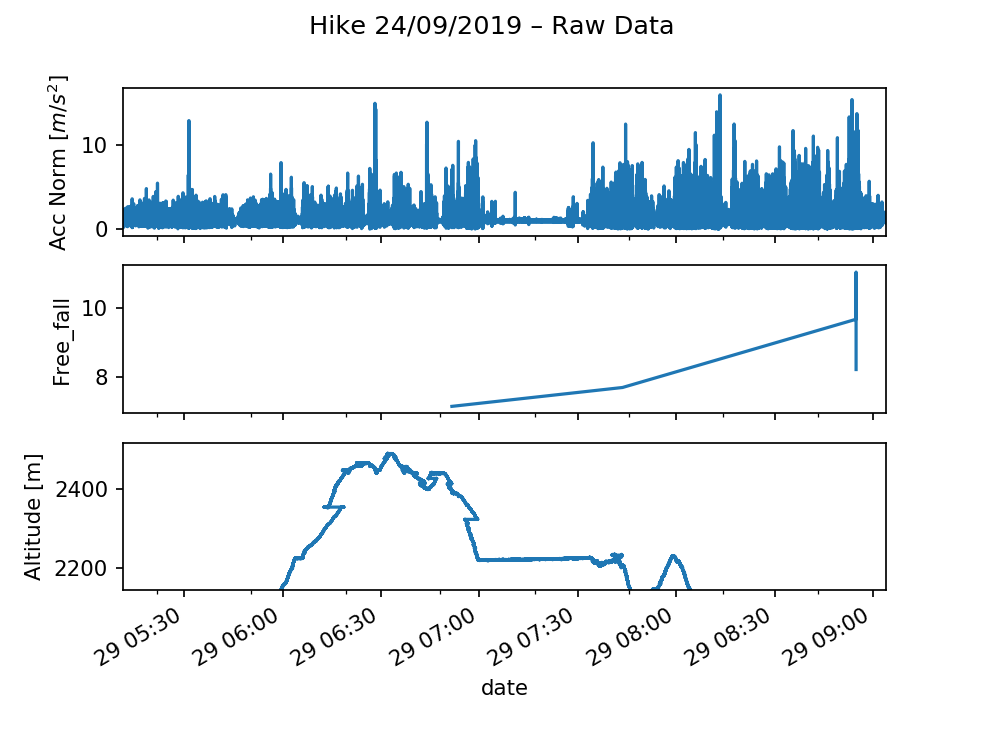

In [54]:
plt.close('all')
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)
fig.suptitle('Hike 24/09/2019 – Raw Data')
axs[0].set_xlabel('Time')
axs[-1].set_xlabel('Time')
axs[0].set_ylabel('Acc Norm [$m/s^2$]')
axs[-1].set_ylabel('Altitude [m]')
axs[0].plot(acc_norm)
axs[-1].plot(alt)
impact = impact.set_index('date')
axs[1].plot(impact)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Free_fall')


#axs[1].plot(gyro_mean)

#fig.tight_layout()
plt.show()

### Apply some filtering, windowing, etc

In [60]:
acc_filt_20 = rolling_mean(acc_norm, 20)
acc_filt_50 = rolling_mean(acc_norm, 50)

In [52]:
gyro_mean = get_windows(gyro_norm, window=200, overlap=0).mean(axis=1)

In [53]:
thres_gyro = 200
gyro_thres = gyro_mean.copy()
gyro_thres[gyro_thres < thres_gyro] = 0
gyro_thres[gyro_thres >= thres_gyro] = 1

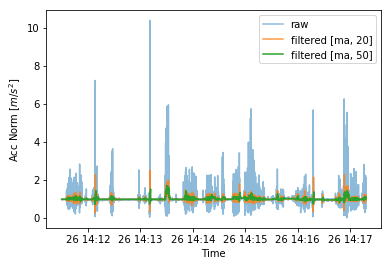

In [54]:
fig, ax = plt.subplots()
ax.plot(acc_norm, label='raw', alpha=0.5)
ax.plot(acc_filt_20, label='filtered [ma, 20]', alpha=0.8)
ax.plot(acc_filt_50, label='filtered [ma, 50]')
ax.set_xlabel('Time')
ax.set_ylabel('Acc Norm $[m/s^2]$')
ax.legend(loc='upper right');

### Filter Barometer Data

In [55]:
df_baro = rolling_mean(baro, window_size=512)

In [56]:
b, a = signal.butter(N=5, Wn=0.1, fs=ds.info.sampling_rate_hz, btype='low')
baro_filt = signal.filtfilt(b, a, df_baro.iloc[:,0])

df_baro['baro_filt'] = baro_filt

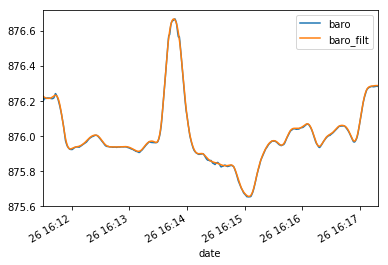

In [57]:
df_baro.plot()

In [ ]:
window = 256

baro_wind = get_windows(df_baro['baro_filt'], window=window, overlap=0)

In [ ]:
baro_dir = pd.DataFrame(baro_wind.sub(baro_wind.iloc[:,0], axis='rows').sum(axis='columns'))
baro_sign = np.sign(baro_dir)

In [ ]:
baro_idx = baro_std.index[::1]
activity = baro_thres[::1]
altitude = alt[::1]

In [ ]:
baro_std = pd.DataFrame(baro_wind.std(axis=1) / window * 1e3)

In [ ]:
baro_thres = baro_std.copy()
thres = 0.05
baro_thres[(baro_std > thres) & (baro_sign > 0)] = 1
baro_thres[(baro_std > thres) & (baro_sign < 0)] = -1
baro_thres[baro_std <= thres] = 0

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('Time')
ax.set_ylabel('Altitude [m]')
ax.plot(altitude, linewidth=3)
ax.set_zorder(10)
ax.patch.set_visible(False)

#asc = np.where(activity.iloc[:,0] == -1)[0]
#idx_asc = np.where(np.diff(asc) > 1)[0]
#idx_asc = zip(np.pad(idx_asc, pad_width=(1,0), mode='edge'), idx_asc)

ax_t = ax.twinx()
ax_t.fill_between(baro_idx, y1=0, y2=1, where=(activity.iloc[:,0] == -1), interpolate=True, facecolor='green', alpha=0.3, label="Ascending")
ax_t.fill_between(baro_idx, y1=0, y2=1, where=(activity.iloc[:,0] == 1), interpolate=True, facecolor='orange', alpha=0.3, label="Descending")
ax_t.fill_between(baro_idx, y1=0, y2=1, where=(activity.iloc[:,0] == 0), interpolate=True, facecolor='blue', alpha=0.3, label="Resting")

#for x1,x2 in idx_asc:
#    ax_t.axvspan(baro_idx[x1], baro_idx[x2], facecolor='green', alpha = 0.1)

ax_t.get_yaxis().set_visible(False)

fig.legend(loc="upper right")
fig.tight_layout()

### Get Stats

In [ ]:
vals, counts = np.unique(baro_thres, return_counts=True)

display("Ascending: {:.2f} %".format(100.0 * (counts[0] / len(baro_thres))))
display("Resting: {:.2f} %".format(100.0 * (counts[1] / len(baro_thres))))
display("Descending: {:.2f} %".format(100.0 * (counts[2] / len(baro_thres))))

#### Helper Functions

In [63]:
def baro_to_altitude(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'altitude'] = 44330 * (1.0 - (df.loc[:, 'baro'] / 1013.0) ** 0.1903)
    return df

In [86]:
def rolling_mean(df: pd.DataFrame, window_size: int) -> pd.DataFrame:
    return df.rolling(window_size, min_periods=1).mean()

In [36]:
def get_windows(df, window: int, overlap: int) -> np.ndarray:
    window_step = window - overlap
    if isinstance(df, pd.DataFrame):
        arr = df.iloc[:,0].to_numpy()
    else:
        arr = df
    new_shape = arr.shape[:-1] + ((arr.shape[-1] - overlap) // window_step, window)
    new_strides = (arr.strides[:-1] + (window_step * arr.strides[-1],) + arr.strides[-1:])
    arr_new = np.lib.stride_tricks.as_strided(arr, shape=new_shape, strides=new_strides)
    return pd.DataFrame(data=arr_new, index=df.index[::window_step][1:])